# Credit Card Fraud Detection - Deep Learning

In this project, we will take a look at one of the most important applications of machine learning in the financial world i.e. the credit card fraud detection.

As every credit card transaction is a promise of money payable between the cardholder's bank and the merchant, there is a very strong incentive for the banks to make good on this promise and prevent any fraudulant activity.


### Dataset

We have dataset with a 31 features and ~300k total trasactions. These are real trasactions but have been anonymized to protect the identity of the users.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

np.random.seed(100)

Using TensorFlow backend.


In [2]:
data = pd.read_csv('Dataset\creditcard.csv')

## Dataset Exploration

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Pre-processing

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data['normalizedAmount'] = sc.fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [6]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [7]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [9]:
X.shape

(284807, 29)

In [10]:
y.shape

(284807, 1)

In [11]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [13]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


### Splitting our dataset

We will split our dataset into 3 parts.

1) Training Dataset
2) Validation Datset
3) Testing Datset

Here, since we do not have millions of samples, we will split our datset into 60%, 20%, 20% into train, validation and test datasets. If we had millions of samples, then this split would not have made any sense since we do not need so much of testing and validation sets. At that time, we will have to make our sound judgement on how we should divide the dataset.


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [15]:
X_train.shape

(199364, 29)

In [16]:
X_test.shape

(85443, 29)

In [17]:
y_train.shape

(199364, 1)

In [19]:
y_test.shape

(85443, 1)

In [20]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

### Building our Deep Neural Network

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [23]:
model = Sequential([
    Dense(units = 16, input_dim=29,activation='relu'),
    Dense(units = 24, activation='relu'),
    Dropout(0.5),
    Dense(20, activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid'),
    
])

### Training our Model

In [24]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
199364/199364 [==============================] - 44s 220us/step - loss: 0.0084 - acc: 0.9988
Epoch 2/5
199364/199364 [==============================] - 40s 203us/step - loss: 0.0042 - acc: 0.9994
Epoch 3/5
199364/199364 [==============================] - 40s 203us/step - loss: 0.0039 - acc: 0.9994
Epoch 4/5
199364/199364 [==============================] - 41s 207us/step - loss: 0.0037 - acc: 0.9993
Epoch 5/5
199364/199364 [==============================] - 41s 203us/step - loss: 0.0035 - acc: 0.9994


In [25]:
score = model.evaluate(X_test, y_test)

85443/85443 [==============================] - 2s 28us/step


In [26]:
print(score)

[0.003965396503098586, 0.9993797034280163]


### Plotting Confusion Matrix

DRY - Don't Repeat Yourself is a very important principle that we have to follow in daily coding practice. 

I have plotted a lot of confusion matrices. A new trick I learned is to copy the code from Scikitlearn website: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

Note: Make sure to import the respective libraries before you run the code.

In [27]:
import itertools
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [29]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

In [32]:
cm = confusion_matrix(y_test, y_pred.round())

In [33]:
print(cm)

[[85273    23]
 [   30   117]]


In [34]:
# Now using the function we imported earlier

Confusion matrix, without normalization
[[85273    23]
 [   30   117]]


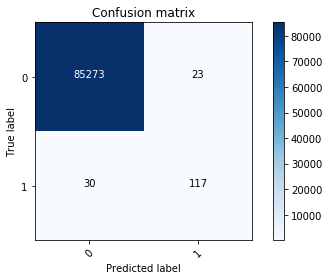

In [35]:
plot_confusion_matrix(cm, classes=[0,1])

Confusion matrix, without normalization
[[284242     73]
 [    86    406]]


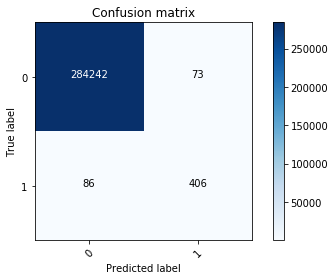

In [36]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cm = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cm, classes=[0,1])